<a href="https://colab.research.google.com/github/rahulsingh7111711/TumorTracer/blob/main/BTDetecn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import tensorflow as tf
import random
import numpy as np
seed_value = 42  # Choose any number
random.seed(seed_value)
np.random.seed(seed_value)
tf.random.set_seed(seed_value)


In [3]:
#get the data from
!wget https://www.dropbox.com/scl/fi/oe65yn618esndeot7wnm0/Brain-Tumor-Data-Set.zip?rlkey=wut9eean2i8acwknkszoh8k71&st=1stt90vo&dl=0

--2025-06-30 09:09:10--  https://www.dropbox.com/scl/fi/oe65yn618esndeot7wnm0/Brain-Tumor-Data-Set.zip?rlkey=wut9eean2i8acwknkszoh8k71
Resolving www.dropbox.com (www.dropbox.com)... 162.125.4.18, 2620:100:6057:18::a27d:d12
Connecting to www.dropbox.com (www.dropbox.com)|162.125.4.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://ucb4c472d66220933b4262d492e4.dl.dropboxusercontent.com/cd/0/inline/CsnOTvR0mGIdIkf1ZgGunkk9mVnoNsTr5FQfdd3As1Nt7MW-NglSayZWEcxD2AWG7D8moIkK4PPMpUzrTwr50F1QEzL0z4RgdJ2Gb4SI1BRt90tVlonfWjrbp-jN36Nsp_qnqyU2TiEHEBMcItOLpqsD/file# [following]
--2025-06-30 09:09:11--  https://ucb4c472d66220933b4262d492e4.dl.dropboxusercontent.com/cd/0/inline/CsnOTvR0mGIdIkf1ZgGunkk9mVnoNsTr5FQfdd3As1Nt7MW-NglSayZWEcxD2AWG7D8moIkK4PPMpUzrTwr50F1QEzL0z4RgdJ2Gb4SI1BRt90tVlonfWjrbp-jN36Nsp_qnqyU2TiEHEBMcItOLpqsD/file
Resolving ucb4c472d66220933b4262d492e4.dl.dropboxusercontent.com (ucb4c472d66220933b4262d492e4.dl.dropboxusercontent.com)... 162.125.

In [4]:
!unzip /content/Brain-Tumor-Data-Set.zip?rlkey=wut9eean2i8acwknkszoh8k71&st=1stt90vo&dl=0

Archive:  /content/Brain-Tumor-Data-Set.zip?rlkey=wut9eean2i8acwknkszoh8k71
   creating: Brain Tumor Data Set/Brain Tumor/
  inflating: Brain Tumor Data Set/Brain Tumor/Cancer (1).jpg  
  inflating: Brain Tumor Data Set/Brain Tumor/Cancer (1).png  
  inflating: Brain Tumor Data Set/Brain Tumor/Cancer (1).tif  
  inflating: Brain Tumor Data Set/Brain Tumor/Cancer (10).jpg  
  inflating: Brain Tumor Data Set/Brain Tumor/Cancer (10).tif  
  inflating: Brain Tumor Data Set/Brain Tumor/Cancer (100).jpg  
  inflating: Brain Tumor Data Set/Brain Tumor/Cancer (1000).jpg  
  inflating: Brain Tumor Data Set/Brain Tumor/Cancer (1001).jpg  
  inflating: Brain Tumor Data Set/Brain Tumor/Cancer (1002).JPG  
  inflating: Brain Tumor Data Set/Brain Tumor/Cancer (1003).jpg  
  inflating: Brain Tumor Data Set/Brain Tumor/Cancer (1004).jpg  
  inflating: Brain Tumor Data Set/Brain Tumor/Cancer (1005).jpg  
  inflating: Brain Tumor Data Set/Brain Tumor/Cancer (1006).jpg  
  inflating: Brain Tumor Data Set

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import os
import math
import shutil
import glob


In [6]:
#count the numer of images in respective classes BrainTumor-0 healthy-1
ROOT_DIR="/content/Brain Tumor Data Set"
number_of_images={}

for dir in os.listdir(ROOT_DIR):
  number_of_images[dir]=len(os.listdir(os.path.join(ROOT_DIR,dir)))

number_of_images.items()


dict_items([('Brain Tumor', 2513), ('Healthy', 2087)])

# WE WILL SPLIT THE DATA SUCH THAT
  *70% FOR TRAIN DATA*

  *15% FOR VALIDATION*


  *15% FOR TESTING*

In [7]:
def dataFolder(path,split):
  # WE WILL CREATE A TRAINGIN FOLDER
  if not os.path.exists("./"+path):
    os.mkdir("./"+path)

    for dir in os.listdir(ROOT_DIR):
      os.makedirs("./"+path+"/"+dir)
      for img in np.random.choice(a = os.listdir(os.path.join(ROOT_DIR,dir)),
                                  size =(math.floor(split*number_of_images[dir])-5),replace=False):
        O=os.path.join(ROOT_DIR,dir,img)
        D=os.path.join("./"+path,dir)
        shutil.copy(O,D)
        os.remove(O)
  else:
    print(f"{path}Folder exists")

In [8]:
dataFolder("train",0.7)

In [9]:
dataFolder("val",0.15)

In [10]:
dataFolder("test",0.15)

#Model Build

In [11]:

from keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense, BatchNormalization, GlobalAvgPool2D
from keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import keras


In [12]:
#CNN model
model = Sequential()
model.add(Conv2D(filters=16 , kernel_size=(3,3),activation='relu' , input_shape = (224,224,3)))

model.add(Conv2D(filters=36 , kernel_size=(3,3),activation='relu' ))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64 , kernel_size=(3,3),activation='relu' ))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=128 , kernel_size=(3,3),activation='relu' ))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=256 , kernel_size=(3,3),activation='relu' ))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(rate=0.25))

model.add(Flatten())
model.add(Dense(units=64, activation= 'relu'))
model.add(Dropout(rate=0.25))
model.add(Dense(units= 1,activation= 'sigmoid'))

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 220, 220, 36)   │         5,220 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 110, 110, 36)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 108, 108, 64)   │        20,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 24, 24, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 12, 12, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 12, 12, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 36864)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │     2,359,360 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,754,917 (10.51 MB)

 Trainable params: 2,754,917 (10.51 MB)

 Non-trainable params: 0 (0.00 B)

In [13]:
model.compile(optimizer='adam', loss=keras.losses.binary_crossentropy,metrics=['accuracy'])

In [15]:
def preprocessingImages1(path):
  #input: Path
  #output: Pre processed images
  image_data=ImageDataGenerator(zoom_range= 0.2, shear_range= 0.2, rescale=1/255, horizontal_flip= True)
  image=image_data.flow_from_directory(directory= path, target_size=(224,224), batch_size = 32,class_mode = 'binary')

  return image

In [16]:
path ="/content/train"
train_data = preprocessingImages1(path)


Found 3209 images belonging to 2 classes.


In [17]:
def preprocessingImages2(path):
  #input: Path
  #output: Pre processed images
  image_data=ImageDataGenerator(rescale=1/255)
  image=image_data.flow_from_directory(directory= path, target_size=(224,224), batch_size = 32,class_mode = 'binary')

  return image

In [18]:
path="/content/test"
test_data=preprocessingImages2(path)

Found 679 images belonging to 2 classes.


In [19]:
path="/content/val"
val_data=preprocessingImages2(path)

Found 679 images belonging to 2 classes.


In [20]:
# Early stopping and model check point

from keras.callbacks import ModelCheckpoint, EarlyStopping

# early stopping

es = EarlyStopping(monitor="val_accuracy", min_delta= 0.01, patience= 5, verbose=1, mode = 'auto')

# Model Check Point
mc = ModelCheckpoint(monitor="val_accuracy", filepath="./bestmodel.keras", verbose= 1, save_best_only=True , mode = 'auto') # Change the file extension to '.keras'

cb = [es,mc]

#Model Training

In [21]:
hs = model.fit(train_data,
               steps_per_epoch= 8,
               epochs= 30,
               verbose= 1,
               validation_data= val_data,
               validation_steps= 16,
               callbacks=cb)

Epoch 1/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.3967 - loss: 0.7358
Epoch 1: val_accuracy improved from -inf to 0.55078, saving model to ./bestmodel.keras
8/8 ━━━━━━━━━━━━━━━━━━━━ 77s 10s/step - accuracy: 0.3973 - loss: 0.7341 - val_accuracy: 0.5508 - val_loss: 0.6927
Epoch 2/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7s/step - accuracy: 0.5555 - loss: 0.6915
Epoch 2: val_accuracy improved from 0.55078 to 0.56055, saving model to ./bestmodel.keras
8/8 ━━━━━━━━━━━━━━━━━━━━ 81s 11s/step - accuracy: 0.5550 - loss: 0.6915 - val_accuracy: 0.5605 - val_loss: 0.6853
Epoch 3/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.5814 - loss: 0.6866
Epoch 3: val_accuracy improved from 0.56055 to 0.56641, saving model to ./bestmodel.keras
8/8 ━━━━━━━━━━━━━━━━━━━━ 82s 11s/step - accuracy: 0.5806 - loss: 0.6871 - val_accuracy: 0.5664 - val_loss: 0.6818
Epoch 4/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.5479 - loss: 0.6899
Epoch 4: val_accuracy did not improve from 0.56641
8/8 ━━━━━━━━━━━━

In [22]:
# Model Graphical Interpretation

h = hs.history
h.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

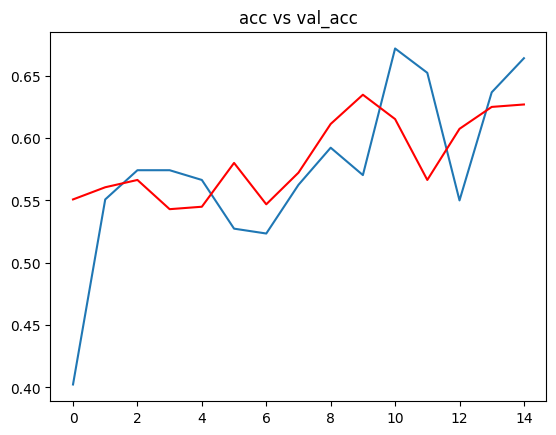

In [23]:
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'] ,c='red')

plt.title("acc vs val_acc")
plt.show()

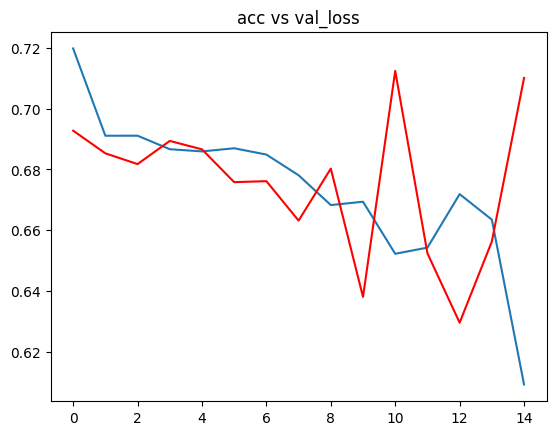

In [24]:
plt.plot(h['loss'])
plt.plot(h['val_loss'] ,c='red')

plt.title("acc vs val_loss")
plt.show()

In [25]:
# Model Accuracy

from keras.models import load_model

model = load_model("/content/bestmodel.keras")

#Model Accuracy

In [26]:
# Model Accuracy

from keras.models import load_model

model = load_model("/content/bestmodel.keras")

acc = model.evaluate(test_data)[1] # Use model.evaluate instead of model.evaluate_generator

print(f"the accuracy of out model is {acc*100}%")

22/22 ━━━━━━━━━━━━━━━━━━━━ 36s 2s/step - accuracy: 0.6467 - loss: 0.6303
the accuracy of out model is 66.1266565322876%


In [27]:
from keras.preprocessing.image import load_img,img_to_array

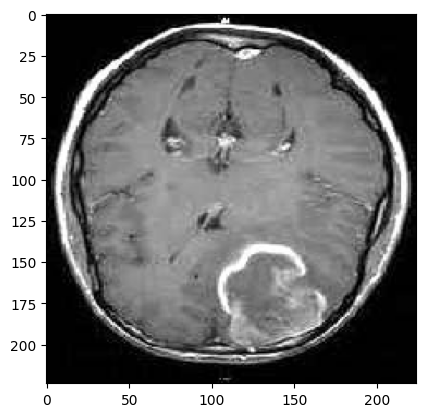

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
The MRI is having a Tumor


In [34]:
path="/content/Brain Tumor Data Set/Brain Tumor/Cancer (1202).jpg"

img = load_img(path, target_size= (224,224))
input_arr = img_to_array(img)/255

plt.imshow(input_arr)
plt.show()


input_arr.shape

input_arr = np.expand_dims(input_arr, axis = 0)

pred_probs = model.predict(input_arr)
# Adjust the threshold here
threshold = 0.4
pred = (pred_probs > threshold).astype(int)[0][0]
if pred==0:
  print("The MRI is having a Tumor")
else:
  print("The MRI is of a Healthy Brain")